<a href="https://colab.research.google.com/github/srikannyaroy/DL-assignment/blob/main/MRM2024009_GAN_ASSIGNMENT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(-1, 28*28))

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    for real_imgs, _ in train_loader:
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        d_optimizer.zero_grad()
        outputs = discriminator(real_imgs)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, 100).to(device) # Move z to the device
        fake_imgs = generator(z)
        outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()

        g_optimizer.zero_grad()
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

torch.save(generator.state_dict(), "generator.pth")

Epoch [1/50], D Loss: 0.2057, G Loss: 6.5092
Epoch [2/50], D Loss: 0.0321, G Loss: 9.1693
Epoch [3/50], D Loss: 0.0894, G Loss: 6.9803
Epoch [4/50], D Loss: 0.4224, G Loss: 3.7887
Epoch [5/50], D Loss: 1.1243, G Loss: 1.8772
Epoch [6/50], D Loss: 1.0711, G Loss: 2.6418
Epoch [7/50], D Loss: 0.3856, G Loss: 2.6502
Epoch [8/50], D Loss: 0.3216, G Loss: 3.6595
Epoch [9/50], D Loss: 0.6016, G Loss: 2.9785
Epoch [10/50], D Loss: 0.8582, G Loss: 2.3961
Epoch [11/50], D Loss: 0.2314, G Loss: 3.6343
Epoch [12/50], D Loss: 1.1897, G Loss: 1.9865
Epoch [13/50], D Loss: 0.7955, G Loss: 2.4335
Epoch [14/50], D Loss: 1.8926, G Loss: 1.3676
Epoch [15/50], D Loss: 0.8208, G Loss: 2.7605
Epoch [16/50], D Loss: 0.4027, G Loss: 2.6446
Epoch [17/50], D Loss: 0.8846, G Loss: 8.1145
Epoch [18/50], D Loss: 0.3373, G Loss: 3.3581
Epoch [19/50], D Loss: 0.3991, G Loss: 5.5858
Epoch [20/50], D Loss: 0.3074, G Loss: 3.7835
Epoch [21/50], D Loss: 0.5153, G Loss: 4.7934
Epoch [22/50], D Loss: 0.2378, G Loss: 3.82

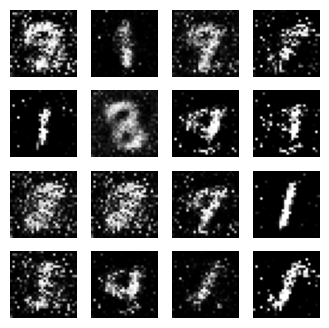

In [ ]:
z = torch.randn(16, 100).to(device)
generated_imgs = generator(z).detach().cpu().numpy()

def show_images(images):
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

show_images(generated_imgs)

**1. Why is Binary Cross-Entropy (BCE) Loss used in GAN training?**

BCE Loss is used because the discriminator is a binary classifier (real vs. fake).

It provides smooth gradient updates, ensuring stable training.

The discriminator outputs probabilities (0 to 1), making BCE a natural choice.

**2. How does the generator improve during training? What challenges arise?**

**How the Generator Improves:**

The generator produces fake images and tries to fool the discriminator.

It learns from the discriminator’s feedback and improves over time.

**Challenges in GAN Training:**

Mode Collapse: The generator produces limited image variety (e.g., only one digit).

Vanishing Gradients: The discriminator gets too strong, and the generator stops learning.

Training Instability: GANs require a balance between the generator and discriminator.

**3. How to Improve Generated Images?**

Use CNN-based GANs (DCGANs): Better spatial structure.

Train for more epochs (100-200): Sharper images.

Use WGAN Loss: More stable training.

Apply Label Smoothing: Reduces overconfidence in discriminator.

**AUTOENCODERS**

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32))

        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Tanh())

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []

In [ ]:
for epoch in range(num_epochs):
    total_loss = 0
    for images, _ in train_loader:
        images = images.to(device)
        reconstructed = model(images)

        loss = criterion(reconstructed, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 0.1389
Epoch [2/10], Loss: 0.0746
Epoch [3/10], Loss: 0.0617
Epoch [4/10], Loss: 0.0541
Epoch [5/10], Loss: 0.0487
Epoch [6/10], Loss: 0.0448
Epoch [7/10], Loss: 0.0421
Epoch [8/10], Loss: 0.0401
Epoch [9/10], Loss: 0.0385
Epoch [10/10], Loss: 0.0369


In [ ]:
def visualize_reconstructions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(test_loader))
        images = images.to(device)
        reconstructed = model(images)

    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axes[1, i].imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].axis('off')

    plt.show()

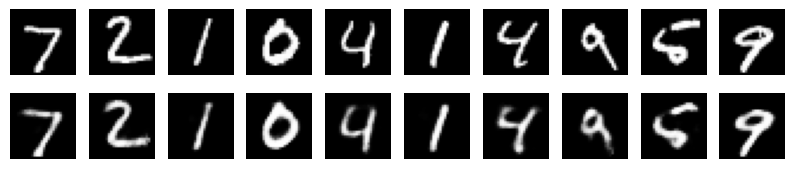

In [ ]:
visualize_reconstructions(model, test_loader)

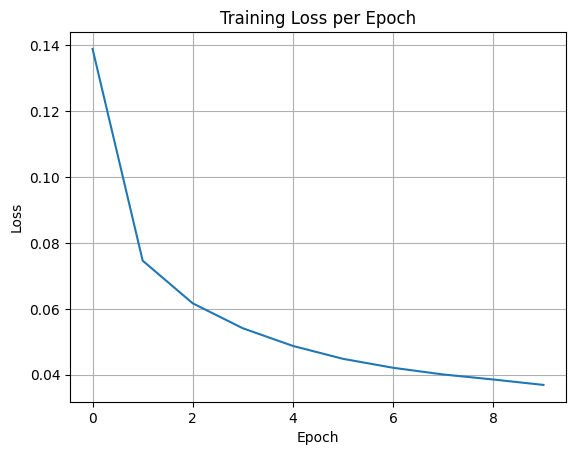

In [ ]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid()
plt.show()